In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/nyt_path.csv")

In [3]:
df["yearmonth"] = pd.to_datetime(df.year * 100 + df.month, format="%Y%m")


In [4]:
g = df.groupby(["dataset_name", "yearmonth"]).count().reset_index()

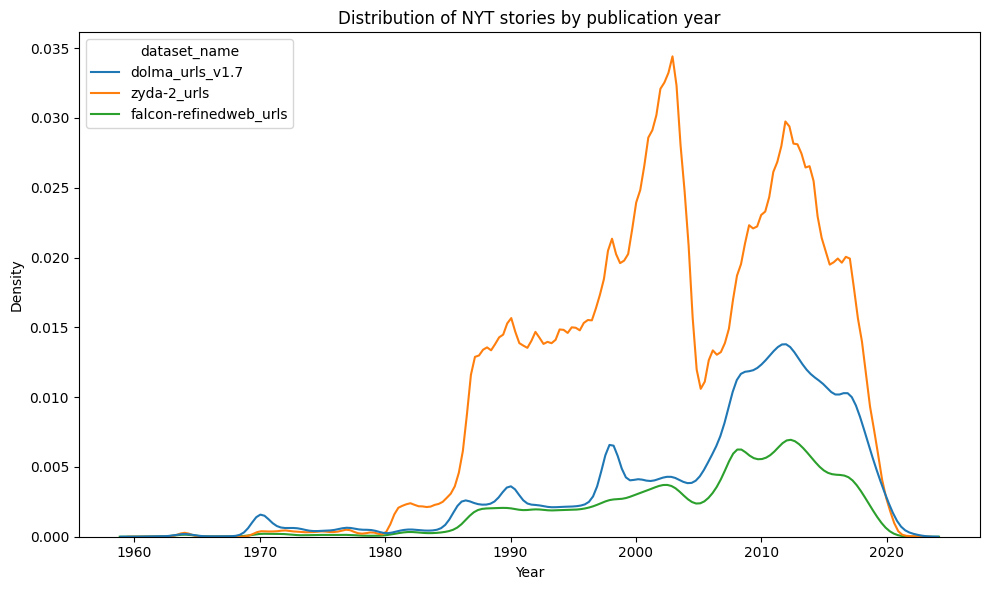

In [5]:
# Create the KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df[df.year > 1960],
    x="year",
    hue="dataset_name",
)
plt.title("Distribution of NYT stories by publication year")
plt.xlabel("Year")
plt.ylabel("Density")
plt.tight_layout()

In [10]:
sections = df.groupby(["dataset_name", "section"]).count().reset_index()

In [27]:
# Calculate total counts per dataset
dataset_totals = df.groupby('dataset_name').size()

# Calculate section counts per dataset
section_counts = df.groupby(['dataset_name', 'section']).size().reset_index(name='count')

# Calculate percentage for each section within its dataset
section_counts['percentage'] = section_counts.apply(
    lambda x: x['count'] / dataset_totals[x['dataset_name']], 
    axis=1
)

# Sort by dataset name and percentage (descending)
section_percentages = section_counts.sort_values(
    ['dataset_name', 'percentage'], 
    ascending=[True, False]
)

# Display the top 10 sections by percentage for each dataset
top_section_percentages = section_percentages.groupby('dataset_name').head(10)
print(f"Top 10 sections by percentage for each dataset:")
print(top_section_percentages)

Top 10 sections by percentage for each dataset:
                  dataset_name   section   count  percentage
25494          dolma_urls_v1.7  business   79181    0.083953
137721         dolma_urls_v1.7        us   78881    0.083635
149641         dolma_urls_v1.7     world   75170    0.079700
89194          dolma_urls_v1.7  nyregion   73794    0.078242
93015          dolma_urls_v1.7   opinion   59777    0.063380
114280         dolma_urls_v1.7    sports   59671    0.063267
15963          dolma_urls_v1.7      arts   53970    0.057223
15080          dolma_urls_v1.7  archives   43380    0.045995
23529          dolma_urls_v1.7     books   26500    0.028097
83047          dolma_urls_v1.7    movies   20385    0.021614
163997  falcon-refinedweb_urls  business   46837    0.093382
195962  falcon-refinedweb_urls  nyregion   45904    0.091521
220547  falcon-refinedweb_urls        us   45825    0.091364
226648  falcon-refinedweb_urls     world   43449    0.086627
208574  falcon-refinedweb_urls    spo

In [28]:
dolma_pct = section_percentages[section_percentages["dataset_name"] == "dolma_urls_v1.7"]
zyda_2_pct = section_percentages[section_percentages["dataset_name"] == "zyda-2_urls"]
refinedweb_pct = section_percentages[section_percentages["dataset_name"] == "falcon-refinedweb_urls"]

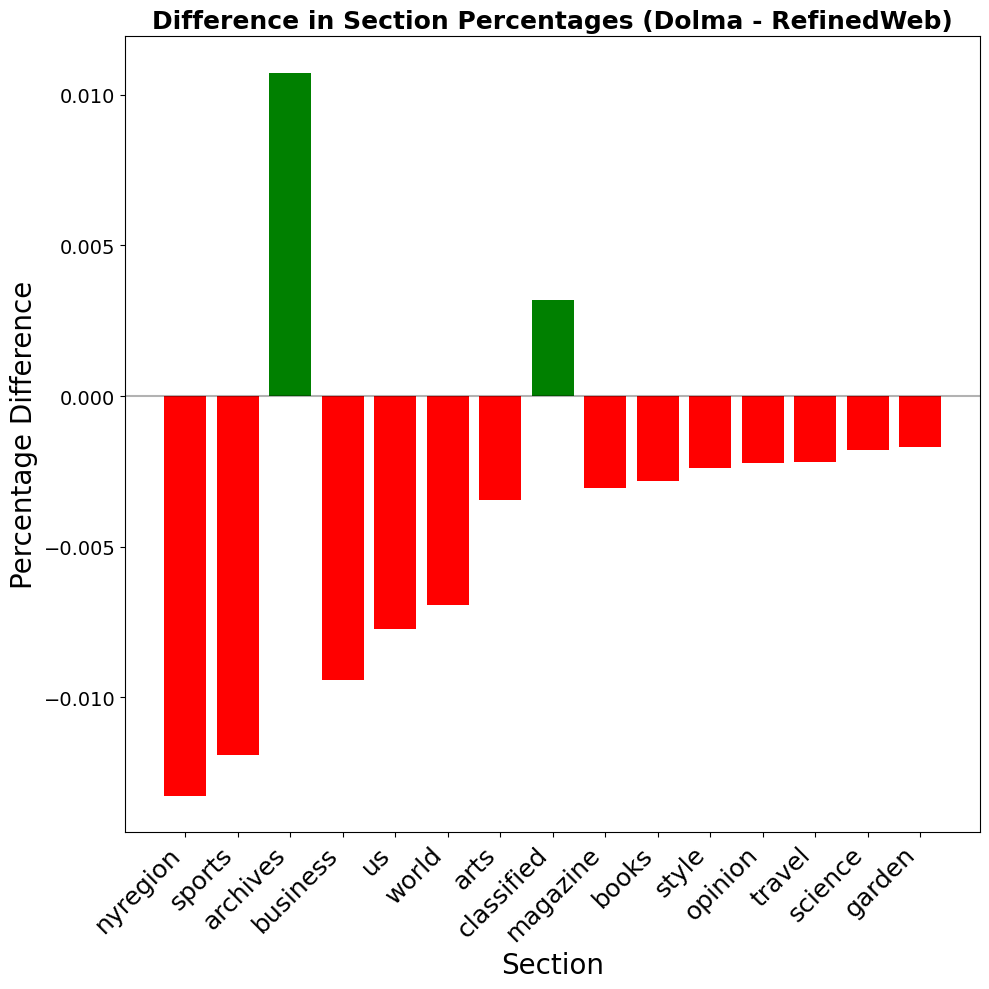

In [48]:
# First, get sections that exist in both datasets
common_sections = set(dolma_pct['section']).intersection(set(refinedweb_pct['section']))

# Create dictionaries for easy lookup of percentages
dolma_dict = dict(zip(dolma_pct['section'], dolma_pct['percentage']))
refinedweb_dict = dict(zip(refinedweb_pct['section'], refinedweb_pct['percentage']))

# Create a dataframe for comparison
comparison_df = pd.DataFrame({
    'section': list(common_sections),
    'dolma_percentage': [dolma_dict.get(section, 0) for section in common_sections],
    'refinedweb_percentage': [refinedweb_dict.get(section, 0) for section in common_sections],
})

# Calculate difference (refinedweb - dolma)
comparison_df['percentage_diff'] = comparison_df['dolma_percentage'] - comparison_df['refinedweb_percentage']

# Sort by absolute difference to see the most different sections
comparison_df = comparison_df.sort_values(by='percentage_diff', key=abs, ascending=False)

# Display the top differences
plt.figure(figsize=(10, 10))
top_diff = comparison_df.head(15)
colors = ['red' if x < 0 else 'green' for x in top_diff['percentage_diff']]

# Create bar chart with adjusted width
bars = plt.bar(top_diff['section'], top_diff['percentage_diff'], color=colors)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Improved font sizes and styling
plt.title('Difference in Section Percentages (Dolma - RefinedWeb)', fontsize=18, fontweight='bold')
plt.xlabel('Section', fontsize=20)
plt.ylabel('Percentage Difference', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=18)
plt.yticks(fontsize=14)
plt.tight_layout()



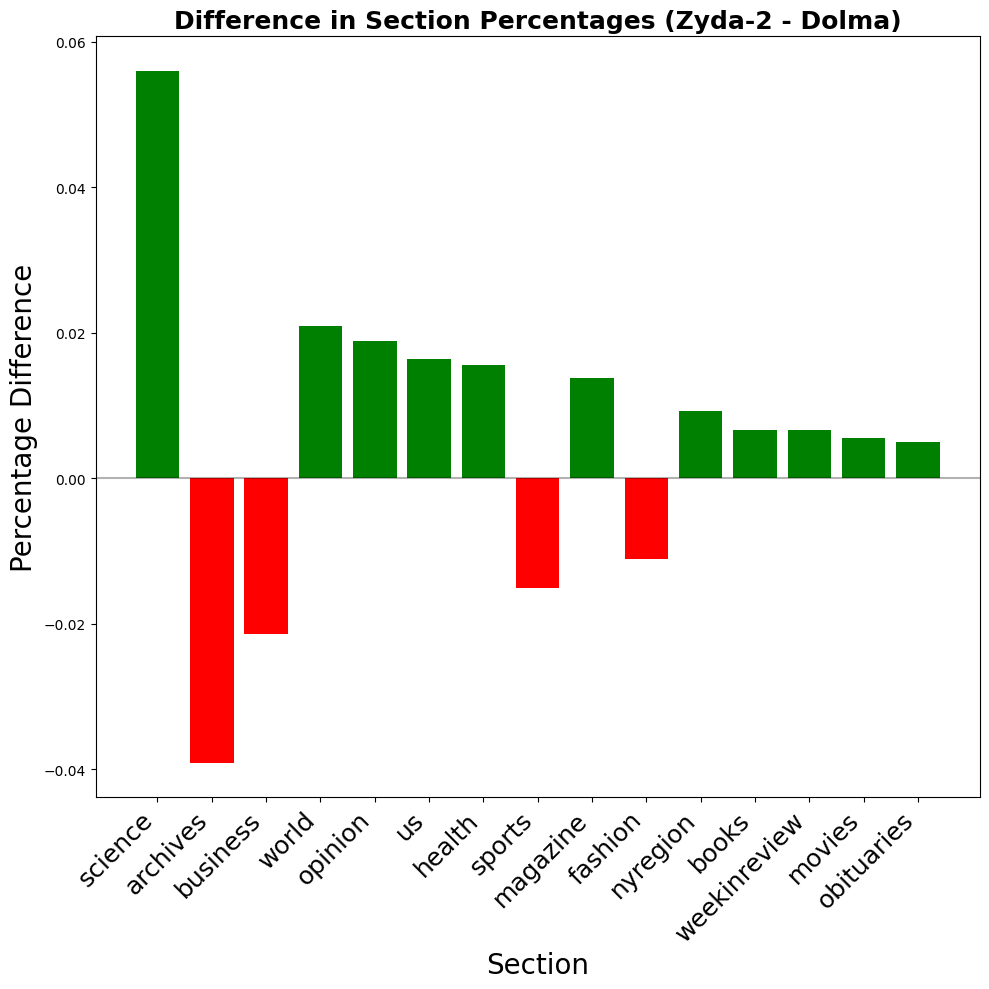

In [43]:
# First, get sections that exist in both datasets
common_sections = set(dolma_pct['section']).intersection(set(zyda_2_pct['section']))

# Create dictionaries for easy lookup of percentages
dolma_dict = dict(zip(dolma_pct['section'], dolma_pct['percentage']))
zyda_2_dict = dict(zip(zyda_2_pct['section'], zyda_2_pct['percentage']))

# Create a dataframe for comparison
comparison_df = pd.DataFrame({
    'section': list(common_sections),
    'dolma_percentage': [dolma_dict.get(section, 0) for section in common_sections],
    'zyda_2_percentage': [zyda_2_dict.get(section, 0) for section in common_sections],
})

# Calculate difference (zyda_2 - dolma)
comparison_df['percentage_diff'] = comparison_df['zyda_2_percentage'] - comparison_df['dolma_percentage']

# Sort by absolute difference to see the most different sections
comparison_df = comparison_df.sort_values(by='percentage_diff', key=abs, ascending=False)

# Display the top differences
plt.figure(figsize=(10, 10))
top_diff = comparison_df.head(15)
colors = ['red' if x < 0 else 'green' for x in top_diff['percentage_diff']]

# Create bar chart
bars = plt.bar(top_diff['section'], top_diff['percentage_diff'], color=colors)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.title('Difference in Section Percentages (Zyda-2 - Dolma)', fontsize=18, fontweight='bold')
plt.xlabel('Section', fontsize=20)
plt.ylabel('Percentage Difference', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=18)
plt.tight_layout()
